<a href="https://colab.research.google.com/github/anaustinbeing/machine-learning/blob/main/ensemble-learning/ensemble_pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

## Load & check the data

In [243]:
df_austin = pd.read_csv('pima-indians-diabetes.csv', names=['preg',
'plas',
'pres',
'skin',
'test',
'mass',
'pedi',
'age',
'class'])

In [244]:
df_austin.head(3)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [245]:
df_austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [246]:
df_austin.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [247]:
df_austin.mean()

preg       3.845052
plas     120.894531
pres      69.105469
skin      20.536458
test      79.799479
mass      31.992578
pedi       0.471876
age       33.240885
class      0.348958
dtype: float64

In [248]:
df_austin.median()

preg       3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

In [249]:
df_austin.min()

preg      0.000
plas      0.000
pres      0.000
skin      0.000
test      0.000
mass      0.000
pedi      0.078
age      21.000
class     0.000
dtype: float64

In [250]:
df_austin.max()

preg      17.00
plas     199.00
pres     122.00
skin      99.00
test     846.00
mass      67.10
pedi       2.42
age       81.00
class      1.00
dtype: float64

In [251]:
df_austin.count()

preg     768
plas     768
pres     768
skin     768
test     768
mass     768
pedi     768
age      768
class    768
dtype: int64

In [252]:
df_austin.shape

(768, 9)

Finding the number of values of each target class:

In [253]:
df_austin['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

There are 500 values for the class 0 and 268 values for the class 1. This is an unbalanced dataset, and we could use balancing techinques like SMOTE to balance the dataset. Balancing is not done here because it was not asked in the question.

## Pre-process and prepare the data for machine learning

In [254]:
features_austin = df_austin.drop('class', axis=1)
class_austin = df_austin['class']

Plotting the class column values (before balancing):

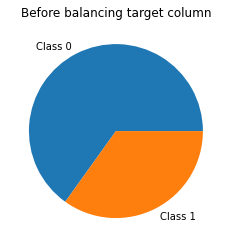

In [255]:
counts = df_austin['class'].value_counts()
count_of_each_targets = [counts.loc[0], counts.loc[1]]
labels = ['Class 0', 'Class 1']

plt.pie(count_of_each_targets, labels = labels)
plt.title('Before balancing target column')
plt.show()

Balancing the class column:

In [256]:
oversample = SMOTE()
features_austin, class_austin = oversample.fit_resample(features_austin, class_austin)

Plotting the class column values (after balancing):

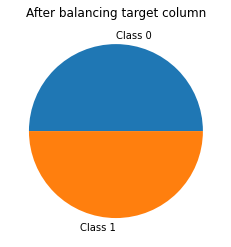

In [257]:
counts = class_austin.value_counts()
count_of_each_targets = [counts.loc[0], counts.loc[1]]
labels = ['Class 0', 'Class 1']

plt.pie(count_of_each_targets, labels = labels)
plt.title('After balancing target column')
plt.show()

In [258]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

transformer_austin = Pipeline([
        ('std_scaler', StandardScaler()),
])

In [259]:
from sklearn.model_selection import train_test_split

X_train_austin, X_test_austin, y_train_austin, y_test_austin = train_test_split(features_austin, class_austin, test_size=0.3, random_state=42)
print('Shapes of data:')
print(X_train_austin.shape, y_train_austin.shape)
print(X_test_austin.shape, y_test_austin.shape)

Shapes of data:
(700, 8) (700,)
(300, 8) (300,)


In [260]:
X_train_austin = transformer_austin.fit_transform(X_train_austin)
X_test_austin = transformer_austin.fit_transform(X_test_austin)

## Hard Voting

In [261]:
lr_austin = LogisticRegression(max_iter=1400)
rf_austin = RandomForestClassifier()
svc_austin = SVC()
dt_austin = DecisionTreeClassifier(criterion='entropy', max_depth=42)
et_austin = ExtraTreesClassifier()

In [262]:
models = [('lr_austin', lr_austin),
          ('rf_austin', rf_austin),
          ('svc_austin', svc_austin),
          ('dt_austin', dt_austin),
          ('et_austin', et_austin)]
hard_voting_classifier = VotingClassifier(estimators=models, voting='hard')
hard_voting_classifier.fit(X_train_austin, y_train_austin)

y_test_austin_predict_1 = hard_voting_classifier.predict(X_test_austin[0].reshape(1, -1))
y_test_austin_predict_2 = hard_voting_classifier.predict(X_test_austin[1].reshape(1, -1))
y_test_austin_predict_3 = hard_voting_classifier.predict(X_test_austin[2].reshape(1, -1))

print('Prediction for the first instance of test data: ', y_test_austin_predict_1)
print('Prediction for the second instance of test data: ', y_test_austin_predict_2)
print('Prediction for the third instance of test data: ', y_test_austin_predict_3)

Prediction for the first instance of test data:  [0]
Prediction for the second instance of test data:  [0]
Prediction for the third instance of test data:  [1]


In [263]:
for name, model in models + [('hard_voting', hard_voting_classifier)]:
  print('Predictions using ', name)
  model.fit(X_train_austin, y_train_austin)
  y_test_austin_predict = model.predict(X_test_austin)
  predict_df = pd.DataFrame(zip(y_test_austin, y_test_austin_predict), columns=['Actual', 'Predicted'])
  print(predict_df)

Predictions using  lr_austin
     Actual  Predicted
0         0          0
1         0          0
2         1          1
3         0          1
4         0          0
..      ...        ...
295       1          1
296       1          1
297       0          0
298       0          1
299       1          1

[300 rows x 2 columns]
Predictions using  rf_austin
     Actual  Predicted
0         0          0
1         0          0
2         1          1
3         0          1
4         0          0
..      ...        ...
295       1          1
296       1          1
297       0          1
298       0          1
299       1          1

[300 rows x 2 columns]
Predictions using  svc_austin
     Actual  Predicted
0         0          0
1         0          1
2         1          1
3         0          1
4         0          0
..      ...        ...
295       1          1
296       1          1
297       0          0
298       0          1
299       1          1

[300 rows x 2 columns]
Predictions 

## Soft Voting

In [264]:
lr_austin = LogisticRegression(max_iter=1400)
rf_austin = RandomForestClassifier()
svc_austin = SVC(probability=True)
dt_austin = DecisionTreeClassifier(criterion='entropy', max_depth=42)
et_austin = ExtraTreesClassifier()

In [265]:
models = [('lr_austin', lr_austin),
          ('rf_austin', rf_austin),
          ('svc_austin', svc_austin),
          ('dt_austin', dt_austin),
          ('et_austin', et_austin)]

soft_voting_classifier = VotingClassifier(estimators=models, voting='soft')
soft_voting_classifier.fit(X_train_austin, y_train_austin)

y_test_austin_predict_1 = soft_voting_classifier.predict(X_test_austin[0].reshape(1, -1))
y_test_austin_predict_2 = soft_voting_classifier.predict(X_test_austin[1].reshape(1, -1))
y_test_austin_predict_3 = soft_voting_classifier.predict(X_test_austin[2].reshape(1, -1))

print('Prediction for the first instance of test data: ', y_test_austin_predict_1)
print('Prediction for the second instance of test data: ', y_test_austin_predict_2)
print('Prediction for the third instance of test data: ', y_test_austin_predict_3)

Prediction for the first instance of test data:  [0]
Prediction for the second instance of test data:  [1]
Prediction for the third instance of test data:  [1]


In [266]:
for name, model in models + [('soft_voting', soft_voting_classifier)]:
  print('Predictions using ', name)
  model.fit(X_train_austin, y_train_austin)
  y_test_austin_predict = model.predict(X_test_austin)
  predict_df = pd.DataFrame(zip(y_test_austin, y_test_austin_predict), columns=['Actual', 'Predicted'])
  print(predict_df)

Predictions using  lr_austin
     Actual  Predicted
0         0          0
1         0          0
2         1          1
3         0          1
4         0          0
..      ...        ...
295       1          1
296       1          1
297       0          0
298       0          1
299       1          1

[300 rows x 2 columns]
Predictions using  rf_austin
     Actual  Predicted
0         0          0
1         0          0
2         1          1
3         0          1
4         0          0
..      ...        ...
295       1          1
296       1          1
297       0          1
298       0          1
299       1          1

[300 rows x 2 columns]
Predictions using  svc_austin
     Actual  Predicted
0         0          0
1         0          1
2         1          1
3         0          1
4         0          0
..      ...        ...
295       1          1
296       1          1
297       0          0
298       0          1
299       1          1

[300 rows x 2 columns]
Predictions 

## Random Forests & Extra Trees

In [267]:
pipeline1_austin = Pipeline([
                             ('transform', transformer_austin),
                             ('et_classifier', et_austin)
])
pipeline2_austin = Pipeline([
                             ('tranform', transformer_austin),
                             ('dt_classifier', dt_austin)
])
pipeline1_austin.fit(X_train_austin, y_train_austin)
pipeline2_austin.fit(X_train_austin, y_train_austin)

Pipeline(steps=[('tranform',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('dt_classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=42))])

10-fold cross validation on the two pipelines:

In [276]:
for pipeline in [pipeline1_austin, pipeline2_austin]:
  print('\n10-fold cross validation on ', pipeline)
  # Performing cross validation with cv=10
  scores = cross_val_score(estimator=pipeline, X=features_austin, y=class_austin, cv=10)
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())


10-fold cross validation on  Pipeline(steps=[('transform',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('et_classifier', ExtraTreesClassifier())])
Scores: [0.8  0.85 0.83 0.75 0.8  0.8  0.91 0.9  0.84 0.87]
Mean: 0.835
Standard deviation: 0.04716990566028302

10-fold cross validation on  Pipeline(steps=[('tranform',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('dt_classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=42))])
Scores: [0.74 0.74 0.74 0.66 0.78 0.81 0.84 0.73 0.74 0.79]
Mean: 0.757
Standard deviation: 0.047549973711874964


In [275]:
for pipeline in [pipeline1_austin, pipeline2_austin]:
  y_test_austin_predict = pipeline.predict(X_test_austin)
  print('For pipeline: ', pipeline)
  print(classification_report(y_test_austin, y_test_austin_predict))

For pipeline:  Pipeline(steps=[('transform',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('et_classifier', ExtraTreesClassifier())])
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       149
           1       0.78      0.89      0.83       151

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

For pipeline:  Pipeline(steps=[('tranform',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('dt_classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=42))])
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       149
           1       0.68      0.75      0.72       151

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300


We find that the accuracy of pipeline 1 is 0.82 and pipeline 2 is 0.70

**Comparing the accuracy of both pipelines with cross validation accuracy:**

> Pipeline 1: Accuracy of the pipeline is slightly less than the cross validation accuracy. (0.82 < 0.83)


> Pipeline 2: Accuracy of the pipeline is slightly less than the cross validation accuracy. (0.70 < 0.76)





## Extra Trees and Grid search

In [270]:
parameters = {
    'et_classifier__n_estimators' : range(10, 3000, 20),
    'et_classifier__max_depth': range(1, 1000, 2)
}

rnd_search = RandomizedSearchCV(pipeline1_austin, param_distributions=parameters, scoring='accuracy')
# print(type(X_train_austin), type(y_train_austin))
rnd_search.fit(X_train_austin, y_train_austin)

RandomizedSearchCV(estimator=Pipeline(steps=[('transform',
                                              Pipeline(steps=[('std_scaler',
                                                               StandardScaler())])),
                                             ('et_classifier',
                                              ExtraTreesClassifier())]),
                   param_distributions={'et_classifier__max_depth': range(1, 1000, 2),
                                        'et_classifier__n_estimators': range(10, 3000, 20)},
                   scoring='accuracy')

In [271]:
best_model = rnd_search.best_estimator_
print(f'Best parameters: {rnd_search.best_params_}')
print(f'Score: {rnd_search.best_score_}')
print(f'Best estimator: {best_model}')

Best parameters: {'et_classifier__n_estimators': 2150, 'et_classifier__max_depth': 59}
Score: 0.8057142857142857
Best estimator: Pipeline(steps=[('transform',
                 Pipeline(steps=[('std_scaler', StandardScaler())])),
                ('et_classifier',
                 ExtraTreesClassifier(max_depth=59, n_estimators=2150))])


The best estimator on train data has a score of ~0.81

Testing the best estimator on Test data:

In [272]:
y_test_pred = best_model.predict(X_test_austin)
print(classification_report(y_test_austin, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       149
           1       0.80      0.90      0.84       151

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



The best estimator on test data has a score of ~0.83 which is almost equal to that on the train data. (0.83 ~ 0.81)